In [6]:
import pandas as pd
import numpy as np 
combat_price = pd.DataFrame([(960,1440,1200),(3,1,1)],columns=["walker","pluage marine","typhus"])
#price_multi_number = lambda x:x^2
#combat_price.apply(price_multi_number,axis=0)
print(combat_price)
print(combat_price.iloc[0,])
print(combat_price.iloc[1,])

print("--------------------------------")
print("價格*數量")
print(combat_price.prod(axis=0))
print("--------------------------------")
print("價格*數量 並且加總")
print(sum(combat_price.prod(axis=0)))

print("定價4080")
print("折扣推測：")
print(round(4080/sum(combat_price.prod(axis=0))*100,2))

   walker  pluage marine  typhus
0     960           1440    1200
1       3              1       1
walker            960
pluage marine    1440
typhus           1200
Name: 0, dtype: int64
walker           3
pluage marine    1
typhus           1
Name: 1, dtype: int64
--------------------------------
價格*數量
walker           2880
pluage marine    1440
typhus           1200
dtype: int64
--------------------------------
價格*數量 並且加總
5520
定價4080
折扣推測：
73.91


In [1]:
import numpy as np 
#temp = np.loadtxt(r"C:\Users\rslab\GitTest-master\retrunperiodrain_1976_2005_rx5dayTWCCDI_yr_ACCESS1-0_historical_1960-2005_.csv")

import pandas as pd
data = pd.read_csv(r"C:\Users\rslab\GitTest-master\retrunperiodrain_1976_2005_rx5dayTWCCDI_yr_ACCESS1-0_historical_1960-2005_.csv")

print("檢視資料前6項")
print(data.head())

data['pos_x'] = data.lon.rank(ascending=True,method='dense').astype(int)
data['pos_y'] = data.lat.rank(ascending=True,method='dense').astype(int)

print("檢視增加矩陣位置")
print(data.head())

print("----------------------------")
print("檢視矩陣位置x最大最小")
print(max(np.unique(data.pos_x)))
print(min(np.unique(data.pos_x)))

print("----------------------------")
print("檢視矩陣位置y最大最小")
print(max(np.unique(data.pos_y)))
print(min(np.unique(data.pos_y)))

ig = np.zeros(shape=(45,68))

print("以迴圈將數值填入影像矩陣中")
#for i in data.pos_x:
for i in range(1,1324):    
    ig[data.pos_x[i]-1,data.pos_y[i]-1] = data.rp25[i]
    
import matplotlib.pyplot as plt

x = np.arange(1,45,1) #len = 11
y = np.arange(1,68,1) #len = 11

#fig
#ax = plt.subplot()
fig, ax = plt.subplots(figsize = (7.5, 10))
ax.pcolormesh(ig.T)
plt.savefig('export_to_png.png')


#fig2
import seaborn as sns

ig_pos_x = data.lon.rank(ascending=True,method='dense').astype(int)
ig_pos_y = data.lat.rank(ascending=False,method='dense').astype(int)
ig2 = np.zeros(shape=(45,68))

print("以迴圈將數值填入影像矩陣中")
#for i in data.pos_x:
for i in range(1,1324):    
    ig2[ig_pos_x[i]-1,ig_pos_y[i]-1] = data.rp25[i]

ax2=plt.figure(figsize=(8.5, 10))
ax2=plt.subplot(111)
sns.heatmap(ig2.T,ax=ax2,vmin=0,vmax=1800,cmap="coolwarm")
plt.savefig('sns_export_to_png.png')
#ax = plt.subplot()
#ax.pcolormesh(ig.T)
#plt.savefig('export_to_png.png')


檢視資料前6項
      lon    lat       rp1.1         rp2         rp5        rp10        rp25  \
0  120.85  21.90  152.746563  342.205170  479.194189  556.425805  643.142002   
1  120.70  21.95  166.101322  366.592613  516.894531  603.199211  701.259952   
2  120.80  21.95  178.637461  397.302391  562.376448  657.492782  765.805584   
3  121.60  21.95  250.479546  421.641909  559.815154  642.039017  737.582178   
4  120.70  22.00  168.721426  362.257887  516.321843  607.401661  712.806640   

         rp50       rp100       rp200  
0  701.589245  755.810167  806.814470  
1  767.976064  830.278296  889.220929  
2  839.624774  908.643935  974.009616  
3  803.719759  866.225784  925.968862  
4  785.545714  854.145319  919.595136  
檢視增加矩陣位置
      lon    lat       rp1.1         rp2         rp5        rp10        rp25  \
0  120.85  21.90  152.746563  342.205170  479.194189  556.425805  643.142002   
1  120.70  21.95  166.101322  366.592613  516.894531  603.199211  701.259952   
2  120.80  21.95  178.

In [3]:

from netCDF4 import Dataset
#import xarray as xr

import netCDF4 as nc
import matplotlib as plt
import seaborn as sns
import numpy as np 
import pandas as pd

#fp = r"C:\Users\rslab\BU\2018NJ\sideProject\pr_BCSD_ACCESS1-0.nc"
#fp = r"C:\Users\rslab\BU\2018NJ\shiny_developing\g4_1_to_20.nc"
fp = r"C:\Users\rslab\BU\2018NJ\sideProject\pr_BCSD_ACCESS1-3.nc"

nc_data = nc.Dataset(fp)

print(nc_data)


print(nc_data.dimensions)


lat = nc_data.variables['lat'][:]
lon = nc_data.variables['lon'][:]
tm = nc_data.variables['time'][:]
pr = nc_data.variables['pr'][:]
print(lat.shape)
print(lon.shape)
print(tm.shape)
print(pr.shape)

#顯示字典
print(nc_data.__dict__)

#關閉nc檔連接
nc_data.close() #此處關閉資料 後面需要從上面變數提取資料

print("------------------------")
print("雨量資料.維度")
print(pr.shape)

print("試畫")
#nc_data.variables['pr'][1,:,:]
#plt.imshow(nc_data.variables['pr'][1,:,:])

da_for_ig = pr[1,:,:]
da = np.flip(da_for_ig,0)
print(da.shape)
print(np.amax(da))
print(np.amin(da))
mask=np.array([da < 0])
mask.shape=(da.shape)
print(mask.shape)
#sns.heatmap(da,mask=mask,center=True).set_title("ehceck time=0 as image")
sns.heatmap(da,mask=mask,vmax=9,vmin=0).set_title("ehceck time=0 as image")

print("------------------------")
print("檢視時間長度(第一維度)")
#da_for_cal = nc_data.variables['pr'][:,3,3]
#print(nc_data.variables['pr'].shape)
da_for_cal = pr[:,3,3]
print(pr.shape)

print("------------------------")
print("測試尋找空間最大值(取一個時間維度)")
#pr_array = np.matrix(nc_data.variables['pr'][1,:,:])
pr_array = np.array(pr)
pr_array.shape=(16790, 81, 60)
#print(pr_array.max())

print("------------------------")
print("測試尋找跨時間最大值(形成一個矩陣)")
#print(np.nanmax(pr_array,0))
for_plt_max = np.nanmax(pr_array,0)
for_plt_max[for_plt_max < 0] = 0
print(for_plt_max)
print(for_plt_max.max())

print("------------------------")
print("測試尋找跨時間最小值(形成一個矩陣)")
#print(np.nanmax(pr_array,0))
for_plt_min = np.nanmin(pr_array,0)
for_plt_min[for_plt_min < 0] = 0
print(for_plt_min)
print(for_plt_min.min())

print("--------------------")
print("模仿R中的apply處理第三維資料_返回最大值(除去NAN)")
print("python讀進nc檔時間維度為第一個維度")

find_nanmax = lambda x: np.nanmax(x,0)
nanmax_oc = np.apply_along_axis(find_nanmax,0,pr)
print(nanmax_oc.shape)

tel_array = pr_array > 1
find_diff = lambda x: np.diff(x,0)
tel_diff_oc = np.apply_along_axis(find_diff,0,tel_array)
print(tel_diff_oc.shape)

print(np.diff(tel_array[:,40,30]))
print(len(np.diff(tel_array[:,40,30])))

tel_array_01 = np.zeros(len(tel_array[:,40,30]))
tel_array_01[tel_array[:,40,30]==1]=1

print(tel_array_01)
print(len(tel_array_01))

diff_01 = np.diff(tel_array_01)
pos_of_one = np.where(diff_01==1)
pos_of_minus_one = np.where(diff_01==-1)

print(type(pos_of_one))
#print(len(pos_of_one)
#print(len(pos_of_minus_one, dtype=int64))


#np.diff(tel_array[:,40,30])==1








#sns.heatmap(np.nanmax(nc_data.variables['pr'],0))

'''

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# We use ax parameter to tell seaborn which subplot to use for this plot
sns.pointplot(x="x", y="y", data=data, ax=ax1)

'''

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Fri Feb 03 14:24:46 2017: cdo settaxis,1960-Jan-01,12:00,1day pr2.nc pr_BCSD_ACCESS1-3.nc
Fri Feb 03 14:24:44 2017: cdo setcalendar,365_day pr.nc pr2.nc
Fri Feb 03 14:24:42 2017: cdo -r -f nc import_binary pr_BCSD_ACCESS1-3.ctl pr.nc
    CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): lon(60), lat(81), time(16790)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 time(time), float32 pr(time, lat, lon)
    groups: 
{'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 60, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 81, 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 16790}
(81,)
(60,)
(16790,)
(16790, 81, 60)
{'CDI': 'Climate Data Interface version 1.6.9

'\n\nfig = plt.figure()\nax1 = fig.add_subplot(211)\nax2 = fig.add_subplot(212)\n\n# We use ax parameter to tell seaborn which subplot to use for this plot\nsns.pointplot(x="x", y="y", data=data, ax=ax1)\n\n'

(16790, 81, 60)
出現消失是否長度一致
(81, 60)
檢視頻度圖
37
大於3的次數


405

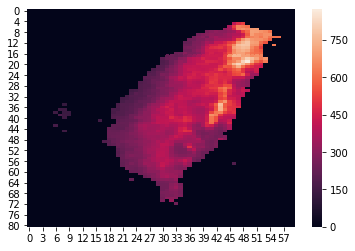

In [197]:
#給定篩選值
given_criterion = 1
#給定連續天數
continue_criterion = 3

#產生篩選值T/F array
tel_array = pr_array > given_criterion
find_diff = lambda x: np.diff(x,0)
tel_diff_oc = np.apply_along_axis(find_diff,0,tel_array)
#print(tel_diff_oc.shape)


def find_countz(x):
    tel_array_01 = np.zeros(len(x))
    tel_array_01[x==1]=1
    diff_01 = np.diff(tel_array_01)
    pos_of_one = np.where(diff_01==1)
    pos_of_minus_one = np.where(diff_01==-1)
    #oc = len(pos_of_one)==len(pos_of_minus_one)
    if len(pos_of_minus_one[0]) == len(pos_of_one[0]):
        continu_len = pos_of_minus_one[0] - pos_of_one[0] 
    elif len(pos_of_minus_one[0]) != len(pos_of_one[0]):
        continu_len = np.append(pos_of_minus_one[0],len(x)) - pos_of_one[0] 
    oc = sum(continu_len > continue_criterion)
    return(oc)

find_countz_oc = np.apply_along_axis(find_countz,0,tel_array)
print("檢視色階圖")
print(find_countz_oc.shape)
sns.heatmap(np.flip(find_countz_oc,0))


print("檢視頻度圖")
#plt.pyplot.hist(continu_len)
print(max(continu_len))

print("大於3的次數")
sum(continu_len > 3)



In [45]:
import numpy as np
#功能_I：計算參數
def find_para(dada):
    oc = mean(dada)
    return(oc)

#功能_II：計算次數
#tel_fun編寫範例：dada > 20
def find_counts(dada,continue_days):
    
    oc = mean(dada)
    return(oc)




#功能設定---------
#資料夾路徑
#dp = ""
#檔案路徑
fp = ""

#分析起點 PS:python起始為0
material_start_yr = 1
#分析終點
material_end_yr = 65
#功能選擇`: 
#1 -> para ->計算參數 預設計算mean
#2 -> count ->計算次數 連續天數預設1
process_function = 2
#時期選擇 "month" 或 "tenday"
#period_type="month"
period_type="tenday"

#預設部分-----------------

#for計算參數 (預設計算mean)
para_to_cal = np.mean
#for連續天數 (預設為1)
continue_day = 1

#依照功能選擇 改變process_mov 
if process_function == 1:
    process_mov = find_para
    show_process = "para_to_cal" + "=" + str(para_to_cal)
    to_process = para_to_cal
elif process_function == 2:
    process_mov = find_counts
    show_process = "continue_day" + "=" + str(continue_day)
    to_process = find_counts

#依功能選擇改變計算長度
if period_type == "month":
    select_mat = "month_mat"
    period_len = 12
    #csv設定 
    #圖片設定
elif period_type == "tenday":
    select_mat = "tenday_mat"
    period_len = 36
    #csv設定 
    #圖片設定
    
    
#計算長度
cal_length = material_end_yr - material_start_yr +1 

print("使用者設定執行--------------------")
print("檔案路徑：" + fp)
print("分析起點：" + str(material_start_yr))
print("分析終點：" + str(material_end_yr))
print("計算年份長度：" + str(cal_length))
print("執行：" + str(process_mov))
print("預設：" + str(show_process))
print("時期選擇：" + period_type + "/長度設定="+ str(period_len))



設定執行--------------------
檔案路徑：
分析起點：1
分析終點：65
計算年份長度：65
執行：<function find_counts at 0x000001E942EA96A8>
預設：continue_day=1
時期選擇：tenday/長度設定=36
